In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv("./PRDTF_202309111120529370.csv", encoding='cp949')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TRDAR_NO   1166 non-null   int64  
 1   TRDAR_NM   1166 non-null   object 
 2   SIGNGU_CD  1166 non-null   int64  
 3   SIGNGU_NM  1166 non-null   object 
 4   LINK_CNT   1166 non-null   int64  
 5   MINM_TXTR  1166 non-null   float64
 6   MAX_TXTR   1166 non-null   float64
 7   AVE_TXTR   1166 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 73.0+ KB


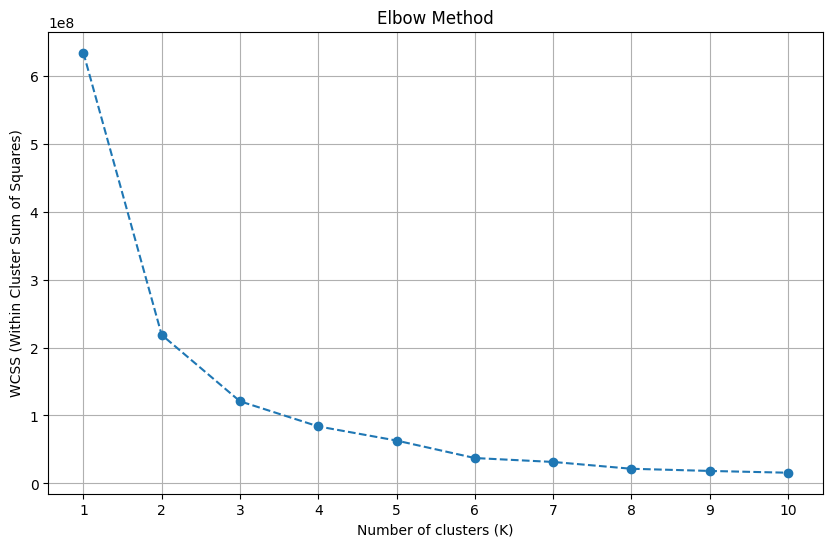

In [5]:
from sklearn.cluster import KMeans

# 최대 클러스터 수 설정
max_clusters = 10
wcss = []

# K 값을 1부터 최대 클러스터 수까지 변경하면서 WCSS 값을 계산
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[['LINK_CNT', 'AVE_TXTR']])
    wcss.append(kmeans.inertia_)

# WCSS 값을 그래프로 나타내기
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

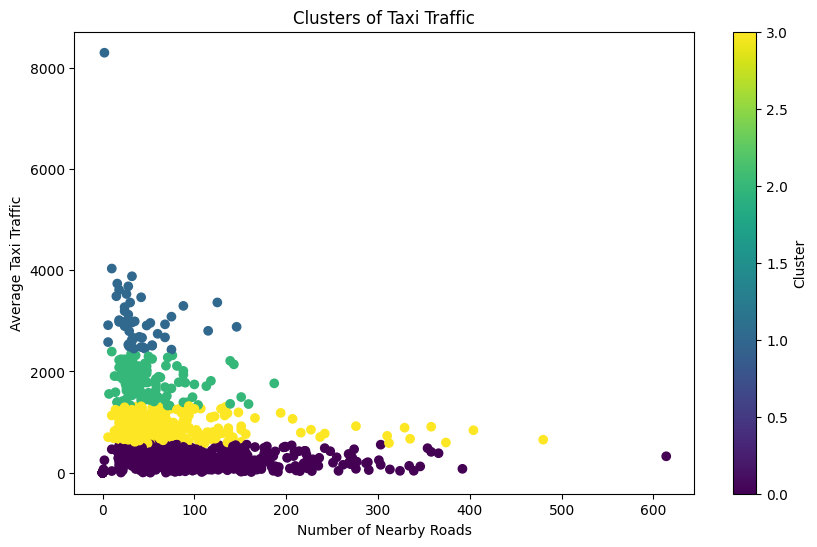

In [8]:
# 결정된 K 값으로 K-means 알고리즘을 초기화하고 클러스터링을 수행
k = 4 
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(df[['LINK_CNT', 'AVE_TXTR']])
labels = kmeans.labels_

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['LINK_CNT'], df['AVE_TXTR'], c=labels, cmap='viridis')
plt.title('Clusters of Taxi Traffic')
plt.xlabel('Number of Nearby Roads')
plt.ylabel('Average Taxi Traffic')
plt.colorbar(label='Cluster')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

# 실루엣 점수 계산
silhouette_avg = silhouette_score(df[['LINK_CNT','AVE_TXTR']], labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.568292501597849
